In [112]:
from fastbook import *
import seaborn as sns
from tools.toolbox import *
from tools.dataset import Data
from tools.feature import *
from tools.train import *
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

In [113]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

In [114]:
df = Data.get_g12d_dedup()

In [115]:
smi2prop?

Signature:
smi2prop(
    df,
    smi_colname='SMILES',
    id_colname='ID',
    remove_duplicate=True,
    normalize=False,
)
Docstring: Extract 208 features from smiles via rdkit.Chem.Descriptors, and remove duplicate features
File:      /usr/local/lib/python3.9/dist-packages/tools/feature.py
Type:      function


In [116]:
smi_feat = smi2prop(df,'SMILES','ID',False,False)

In [117]:
smi_feat

ID  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
0        US_1          10.404881       10.404881           0.222196   
1        US_4          16.363674       16.363674           0.044638   
2        US_5          16.350189       16.350189           0.041542   
3        US_6          16.416594       16.416594           0.044910   
4        US_7          16.353674       16.353674           0.038721   
..        ...                ...             ...                ...   
655  paper_23          16.539717       16.539717           0.037197   
656  paper_22          16.586838       16.586838           0.021143   
657  paper_35          16.499105       16.499105           0.009869   
658     US_56          16.200736       16.200736           0.066776   
659     US_66          16.654060       16.654060           0.061666   

     MinEStateIndex       qed    MolWt  HeavyAtomMolWt  ExactMolWt  \
0          0.222196  0.429435  496.615         464.359  496.258674   
1         -0.569828  0.332895  522.584         495.368  522.217952   
2         -0.578340  0.366016  511.561         485.353  511.213201   
3         -0.569046  0.314640  536.611         507.379  536.233602   
4         -0.582174  0.340776  523.572         497.364  523.213201   
..              ...       ...      ...             ...         ...   
655       -0.581889  0.379162  554.626         523.378  554.244167   
656       -0.524831  0.355512  554.670         519.390  554.280553   
657       -1.027754  0.359594  560.624         529.376  560.251144   
658       -1.098656  0.363594  509.969         484.769  509.162996   
659       -0.490507  0.262355  607.561         574.297  606.207693   

     NumValenceElectrons  NumRadicalElectrons  MaxPartialCharge  \
0                  190.0                  0.0          0.318508   
1                  196.0                  0.0          0.318564   
2                  192.0                  0.0          0.318950   
3                  202.0                  0.0          0.318564   
4                  196.0                  0.0          0.318565   
..                   ...                  ...               ...   
655                210.0                  0.0          0.318640   
656                212.0                  0.0          0.318621   
657                212.0                  0.0          0.318621   
658                186.0                  0.0          0.318649   
659                218.0                  0.0          0.318621   

     MinPartialCharge  MaxAbsPartialCharge  MinAbsPartialCharge  \
0           -0.507919             0.507919             0.318508   
1           -0.507919             0.507919             0.318564   
2           -0.507919             0.507919             0.318950   
3           -0.507919             0.507919             0.318564   
4           -0.507919             0.507919             0.318565   
..                ...                  ...                  ...   
655         -0.507919             0.507919             0.318640   
656         -0.507919             0.507919             0.318621   
657         -0.461423             0.461423             0.318621   
658         -0.460547             0.460547             0.318649   
659         -0.461423             0.461423             0.318621   

     FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  BCUT2D_MWHI  \
0            1.027027          1.864865          2.675676    16.493573   
1            0.974359          1.794872          2.615385    19.142257   
2            1.078947          1.894737          2.684211    19.142257   
3            1.025000          1.850000          2.675000    19.142257   
4            0.974359          1.769231          2.589744    19.142257   
..                ...               ...               ...          ...   
655          1.097561          1.926829          2.780488    19.142258   
656          1.000000          1.804878          2.682927    19.142258   
657          0.951220          1.731707  

In [118]:
FEATURES = smi_feat.columns[1:]

In [119]:
scaler = StandardScaler()
smi_feat[FEATURES] = scaler.fit_transform(smi_feat[FEATURES])

In [ ]:
# Save the scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [120]:
df.IC50.sort_values(ascending=False)[:10]

598    100000.0
602     54000.0
603     12000.0
496     10000.0
534     10000.0
533     10000.0
531     10000.0
530     10000.0
525     10000.0
516     10000.0
Name: IC50, dtype: float64

In [121]:
df.loc[df['IC50'] > 10000, 'IC50'] = 10000

In [122]:
df.IC50.sort_values()[:10]

246    0.1
53     0.4
209    0.4
294    0.4
449    0.4
385    0.4
387    0.5
211    0.5
564    0.5
571    0.5
Name: IC50, dtype: float64

In [123]:
df.IC50.value_counts()

10000.0    19
0.7        11
0.6         8
2.0         8
1.0         7
           ..
28.1        1
94.0        1
70.2        1
229.7       1
273.8       1
Name: IC50, Length: 518, dtype: int64

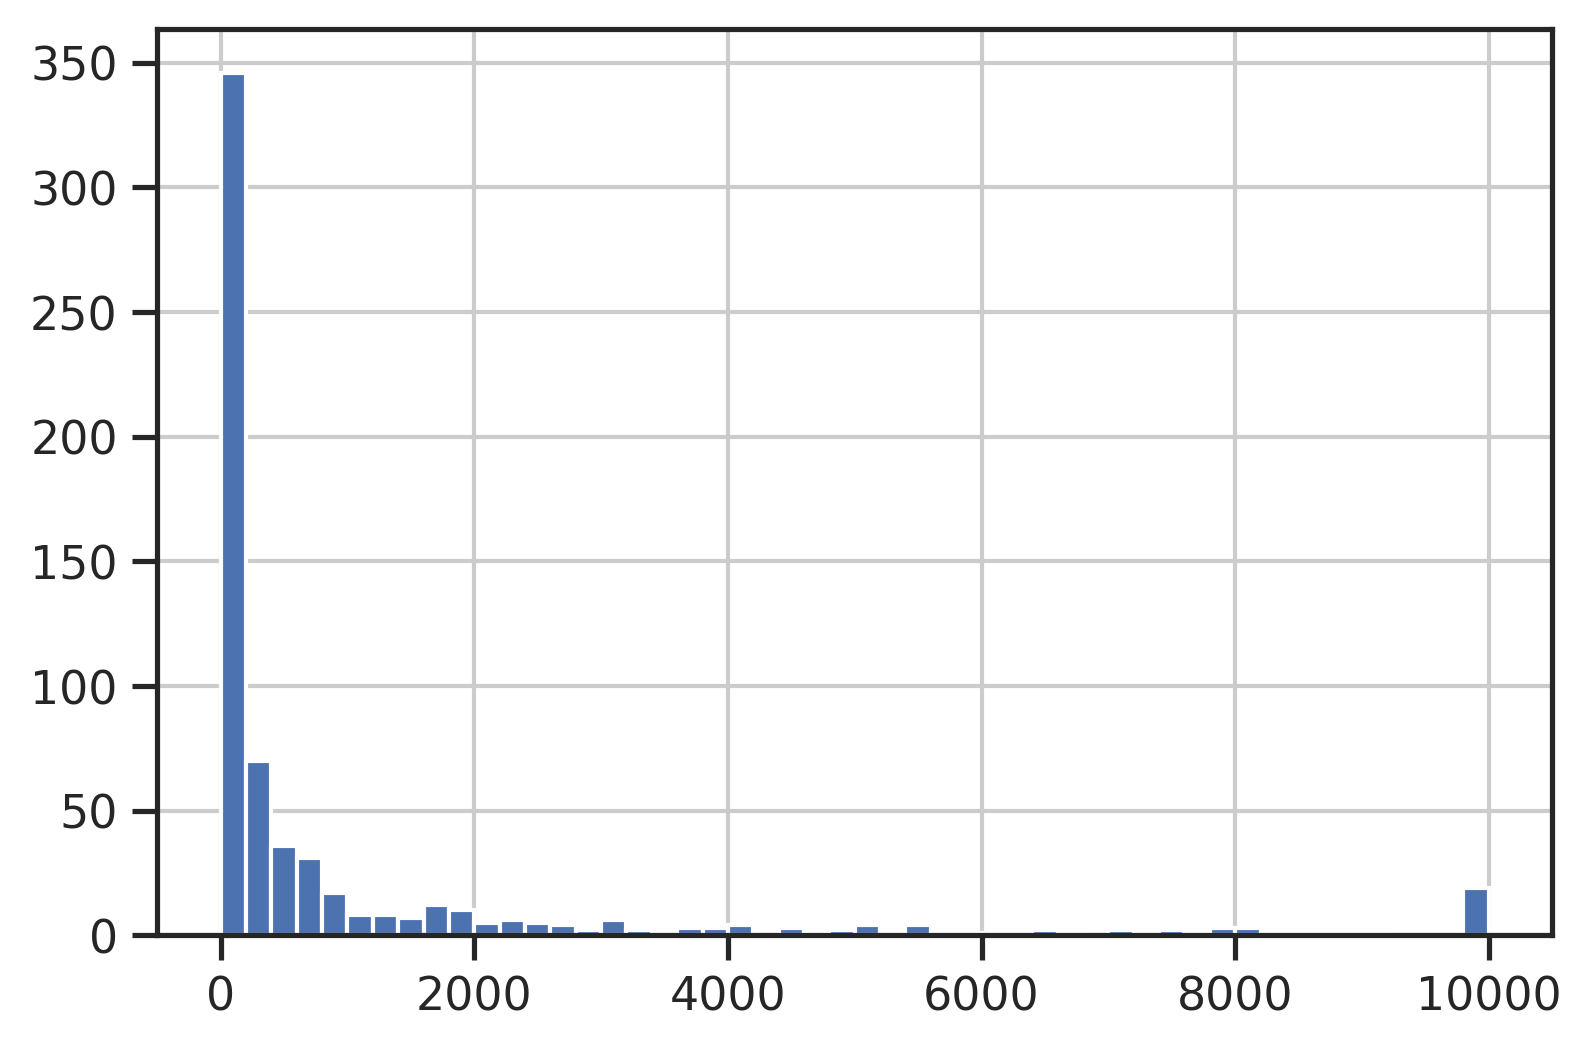

In [124]:
df.IC50.hist(bins=50);

In [125]:
# df = df.query('IC50<10000').reset_index(drop=True)
# df = df.query('IC50<20000').reset_index(drop=True)

In [126]:
df

ID  \
0        US_1   
1        US_4   
2        US_5   
3        US_6   
4        US_7   
..        ...   
655  paper_23   
656  paper_22   
657  paper_35   
658     US_56   
659     US_66   

                                                                                           SMILES  \
0                                CN1CCC[C@H]1COc1nc(N2CC3CCC(C2)N3)c2cnc(cc2n1)-c1cc(O)cc2ccccc12   
1                                  Oc1cc(-c2ncc3c(nc(OCCc4ccccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1   
2                                 Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12   
3                               Cc1cccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12   
4                                  Oc1cc(-c2ncc3c(nc(OCCc4ncccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1   
..                                                                                            ...   
655  FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OCC56N(CCC6)C(CC5)=O)N=C4N7C[C@@H](CC8)N[C@@H]8C7   
656     FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OCC5(CCCC6)N6CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7   
657   FC1=C(C2=C(C(F)=C(F)C=C3)C3=CC=C2)N=CC4=C1N=C(OCC56N(CCC6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7   
658                           OC[C@@H](O)COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cccc2cccc(Cl)c12   
659                 Fc1c(ncc2c(nc(OC[C@@]34CCCN3C(CCl)CC4)nc12)N1CC2CCC(C1)N2)-c1cccc2cccc(Cl)c12   

          Kd    IC50  erk_IC50  
0       97.7   124.7    3159.1  
1      155.7   496.2    8530.0  
2      294.8   722.9    8193.8  
3      442.2   434.1   11518.2  
4      463.5  1867.3       NaN  
..       ...     ...       ...  
655      NaN   750.5   10000.0  
656      NaN    12.0     650.0  
657      NaN     7.0      97.0  
658  13805.3  6024.0       NaN  
659      NaN   273.8    1332.6  

[660 rows x 5 columns]

In [127]:
# df['IC50'].apply(lambda x: np.log(x)).hist(bins=20);

In [128]:
for i in ['Kd','IC50','erk_IC50']:
    df[f'log_{i}'] = df[i].apply(lambda x: np.log(x))

In [129]:
df

ID  \
0        US_1   
1        US_4   
2        US_5   
3        US_6   
4        US_7   
..        ...   
655  paper_23   
656  paper_22   
657  paper_35   
658     US_56   
659     US_66   

                                                                                           SMILES  \
0                                CN1CCC[C@H]1COc1nc(N2CC3CCC(C2)N3)c2cnc(cc2n1)-c1cc(O)cc2ccccc12   
1                                  Oc1cc(-c2ncc3c(nc(OCCc4ccccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1   
2                                 Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12   
3                               Cc1cccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12   
4                                  Oc1cc(-c2ncc3c(nc(OCCc4ncccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1   
..                                                                                            ...   
655  FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OCC56N(CCC6)C(CC5)=O)N=C4N7C[C@@H](CC8)N[C@@H]8C7   
656     FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OCC5(CCCC6)N6CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7   
657   FC1=C(C2=C(C(F)=C(F)C=C3)C3=CC=C2)N=CC4=C1N=C(OCC56N(CCC6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7   
658                           OC[C@@H](O)COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cccc2cccc(Cl)c12   
659                 Fc1c(ncc2c(nc(OC[C@@]34CCCN3C(CCl)CC4)nc12)N1CC2CCC(C1)N2)-c1cccc2cccc(Cl)c12   

          Kd    IC50  erk_IC50    log_Kd  log_IC50  log_erk_IC50  
0       97.7   124.7    3159.1  4.581902  4.825911      8.058042  
1      155.7   496.2    8530.0  5.047931  6.206979      9.051345  
2      294.8   722.9    8193.8  5.686297  6.583271      9.011133  
3      442.2   434.1   11518.2  6.091762  6.073275      9.351684  
4      463.5  1867.3       NaN  6.138806  7.532249           NaN  
..       ...     ...       ...       ...       ...           ...  
655      NaN   750.5   10000.0       NaN  6.620740      9.210340  
656      NaN    12.0     650.0       NaN  2.484907      6.476972  
657      NaN     7.0      97.0       NaN  1.945910      4.574711  
658  13805.3  6024.0       NaN  9.532808  8.703507           NaN  
659      NaN   273.8    1332.6       NaN  5.612398      7.194887  

[660 rows x 8 columns]

In [130]:
df = df.replace([-np.inf, np.inf], np.nan)

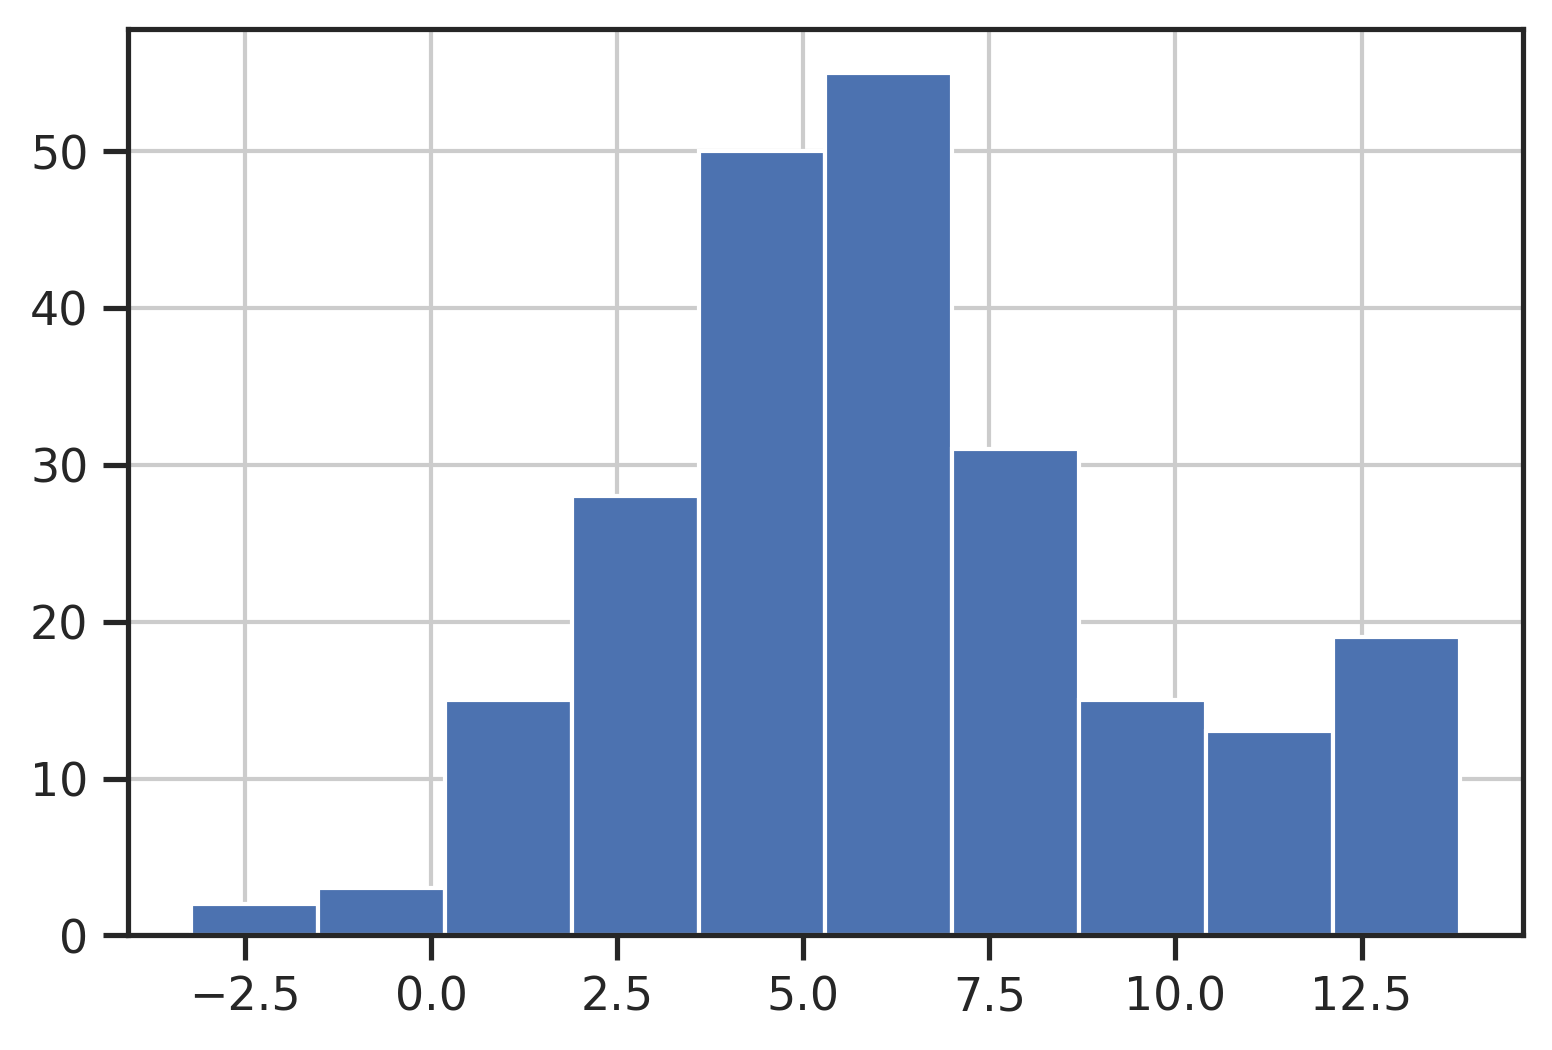

In [131]:
df.log_Kd.hist();

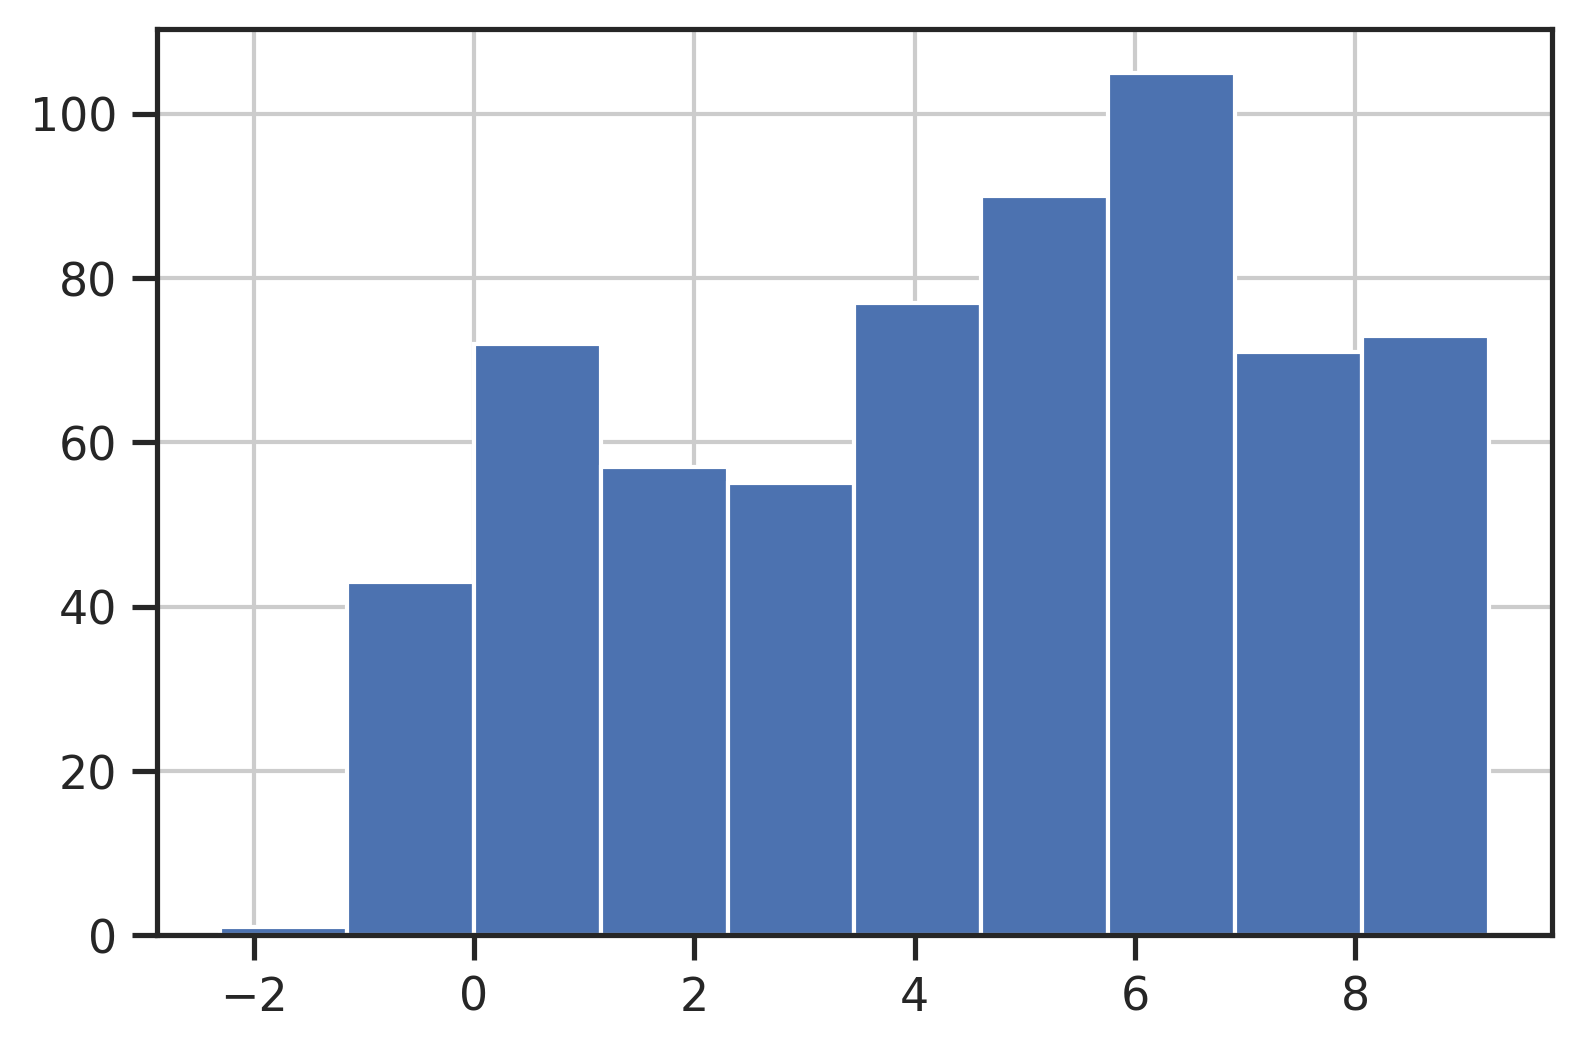

In [132]:
df.log_IC50.hist();

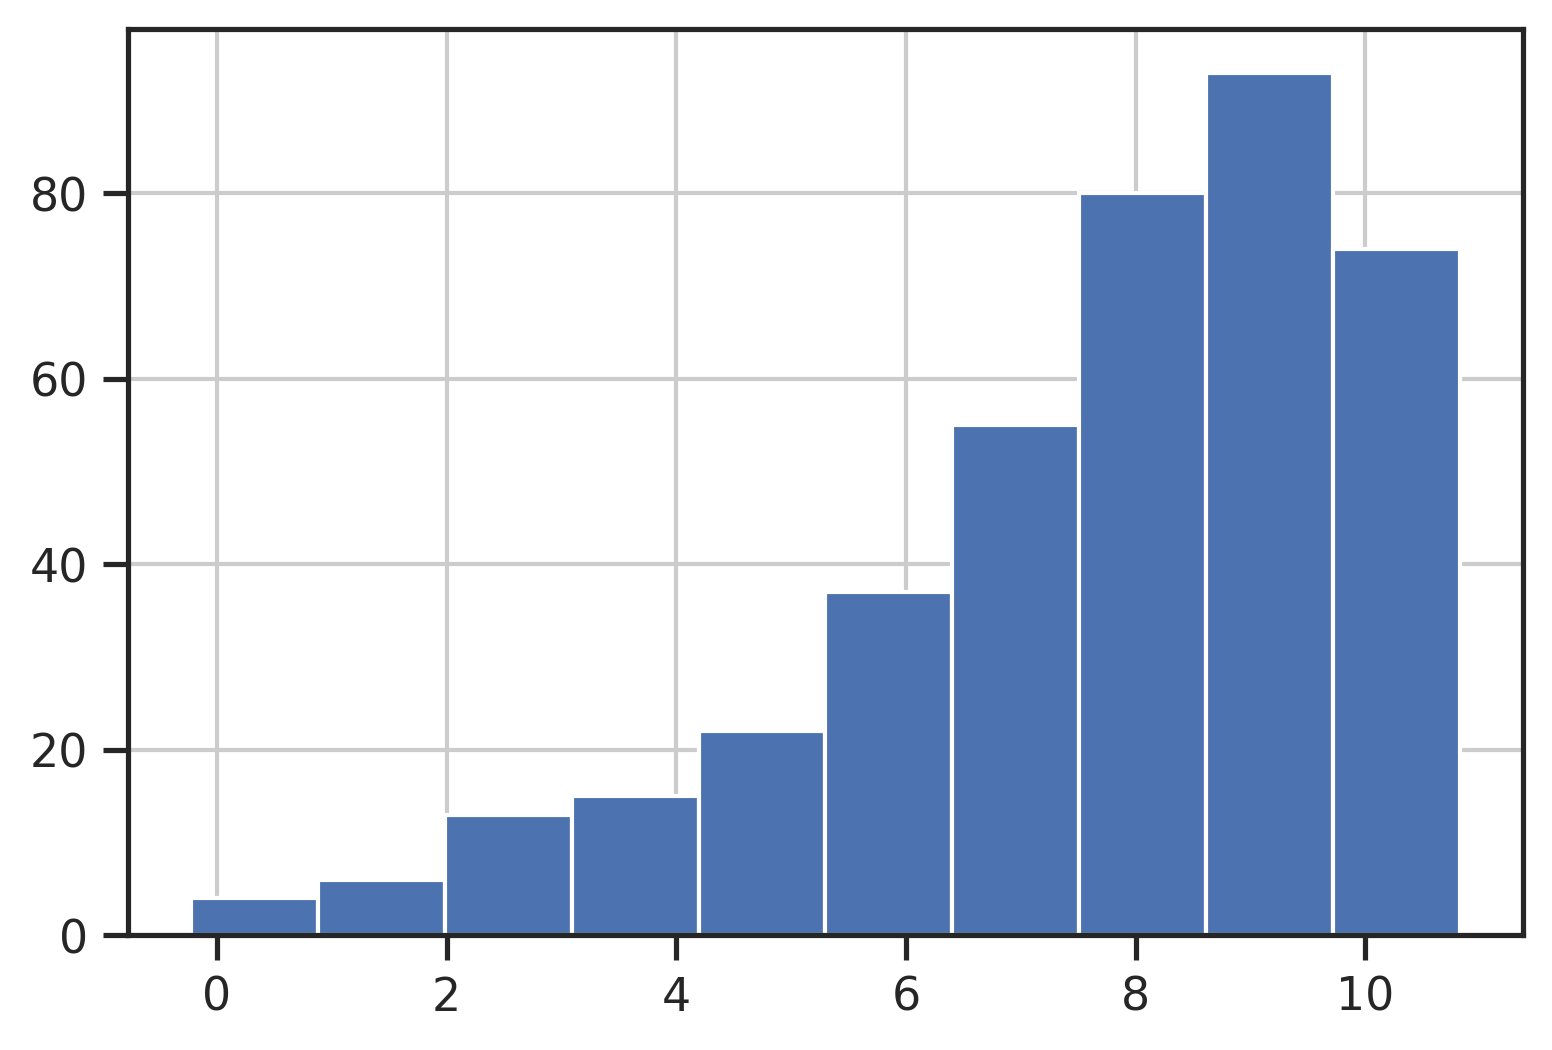

In [133]:
df.log_erk_IC50.hist();

In [134]:
FEATURES = smi_feat.columns[1:]

In [135]:
df = df.merge(smi_feat)

In [136]:
df

ID  \
0        US_1   
1        US_4   
2        US_5   
3        US_6   
4        US_7   
..        ...   
655  paper_23   
656  paper_22   
657  paper_35   
658     US_56   
659     US_66   

                                                                                           SMILES  \
0                                CN1CCC[C@H]1COc1nc(N2CC3CCC(C2)N3)c2cnc(cc2n1)-c1cc(O)cc2ccccc12   
1                                  Oc1cc(-c2ncc3c(nc(OCCc4ccccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1   
2                                 Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12   
3                               Cc1cccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cc(O)cc2ccccc12   
4                                  Oc1cc(-c2ncc3c(nc(OCCc4ncccn4)nc3c2F)N2CC3CCC(C2)N3)c2ccccc2c1   
..                                                                                            ...   
655  FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OCC56N(CCC6)C(CC5)=O)N=C4N7C[C@@H](CC8)N[C@@H]8C7   
656     FC1=C(C2=C(C=CC=C3)C3=CC(O)=C2)N=CC4=C1N=C(OCC5(CCCC6)N6CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7   
657   FC1=C(C2=C(C(F)=C(F)C=C3)C3=CC=C2)N=CC4=C1N=C(OCC56N(CCC6)CCC5)N=C4N7C[C@@H](CC8)N[C@@H]8C7   
658                           OC[C@@H](O)COc1nc(N2CC3CCC(C2)N3)c2cnc(c(F)c2n1)-c1cccc2cccc(Cl)c12   
659                 Fc1c(ncc2c(nc(OC[C@@]34CCCN3C(CCl)CC4)nc12)N1CC2CCC(C1)N2)-c1cccc2cccc(Cl)c12   

          Kd    IC50  erk_IC50    log_Kd  log_IC50  log_erk_IC50  \
0       97.7   124.7    3159.1  4.581902  4.825911      8.058042   
1      155.7   496.2    8530.0  5.047931  6.206979      9.051345   
2      294.8   722.9    8193.8  5.686297  6.583271      9.011133   
3      442.2   434.1   11518.2  6.091762  6.073275      9.351684   
4      463.5  1867.3       NaN  6.138806  7.532249           NaN   
..       ...     ...       ...       ...       ...           ...   
655      NaN   750.5   10000.0       NaN  6.620740      9.210340   
656      NaN    12.0     650.0       NaN  2.484907      6.476972   
657      NaN     7.0      97.0       NaN  1.945910      4.574711   
658  13805.3  6024.0       NaN  9.532808  8.703507           NaN   
659      NaN   273.8    1332.6       NaN  5.612398      7.194887   

     MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0            -1.908996       -1.908996           1.356825        0.919937   
1             0.367381        0.367381          -0.487802        0.270076   
2             0.362229        0.362229          -0.519973        0.263092   
3             0.387597        0.387597          -0.484980        0.270718   
4             0.363561        0.363561          -0.549275        0.259946   
..                 ...             ...                ...             ...   
655           0.434632        0.434632          -0.565111        0.260180   
656           0.452634        0.452634          -0.731891        0.306996   
657           0.419118        0.419118          -0.849015       -0.105656   
658           0.305135        0.305135          -0.257813       -0.163831   
659           0.478314        0.478314          -0.310907        0.335160   

          qed     MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0    0.490964 -1.170004       -1.205054   -1.168491            -1.034317   
1   -0.445871 -0.687431       -0.597836   -0.685194            -0.735347   
2   -0.124466 -0.892268       -0.793949   -0.890075            -0.934660   
3   -0.623025 -0.426773       -0.362636   -0.424258            -0.436376   
4   -0.369394 -0.669072       -0.558750   -0.666665            -0.735347   
..        ...       ...             ...         ...                  ...   
655  0.003110 -0.092007       -0.049344   -0.088947            -0.037749   
656 -0.226397 -0.091189       -0.127437   -0.088270             0.061908   
657 -0.186785  0.019452        0.068109    0.022888             0.061908   
658 -0.147967 -0.921851       -0.805385   -0.928245            -1.233631   
659 -1.130404  

In [137]:
df['group'] = df.ID.apply(lambda i: i.split('_')[0])

In [138]:
df.group.value_counts()

US       425
646      111
31678     61
paper     34
625       29
Name: group, dtype: int64

In [139]:
df_IC50 = df.dropna(subset='log_IC50')

xgb params is: {'max_depth': 7, 'learning_rate': 0.001, 'subsample': 0.8, 'colsample_bytree': 0.2, 'eval_metric': 'rmse', 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor', 'random_state': 123}
(515, 168) (515, 1) (129, 168) (129, 1)
Int64Index([ 92, 240,  55, 578, 273, 355, 236, 323, 466, 219,
            ...
            206, 282,  82, 169, 418, 457,  17, 277, 317, 246],
           dtype='int64', length=129)
[0]	train-rmse:4.98443	valid-rmse:4.63075
[100]	train-rmse:4.57533	valid-rmse:4.27477
[200]	train-rmse:4.20267	valid-rmse:3.95985
[300]	train-rmse:3.86561	valid-rmse:3.67900
[400]	train-rmse:3.55948	valid-rmse:3.43081
[500]	train-rmse:3.28046	valid-rmse:3.20905
[600]	train-rmse:3.02812	valid-rmse:3.01414
[700]	train-rmse:2.79742	valid-rmse:2.84012
[800]	train-rmse:2.58805	valid-rmse:2.68783
[900]	train-rmse:2.39640	valid-rmse:2.55409
[1000]	train-rmse:2.22321	valid-rmse:2.43738
[1100]	train-rmse:2.06536	valid-rmse:2.33581
[1200]	train-rmse:1.

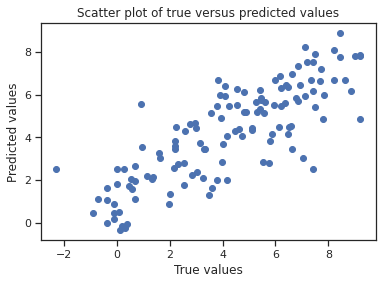

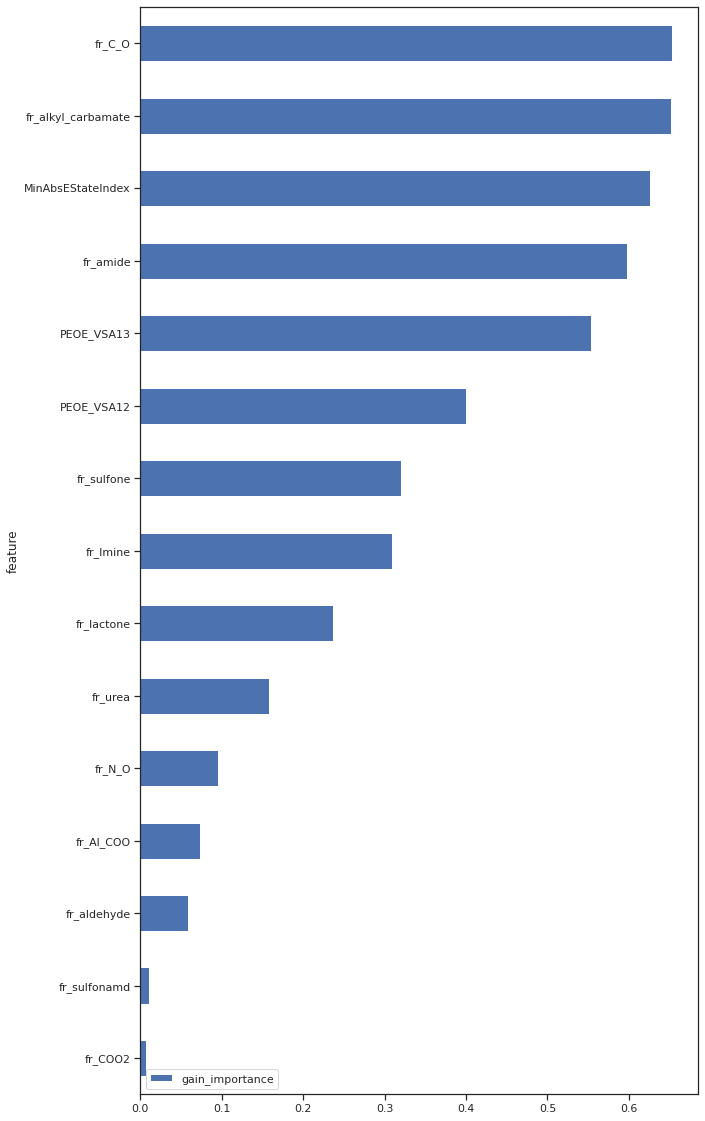

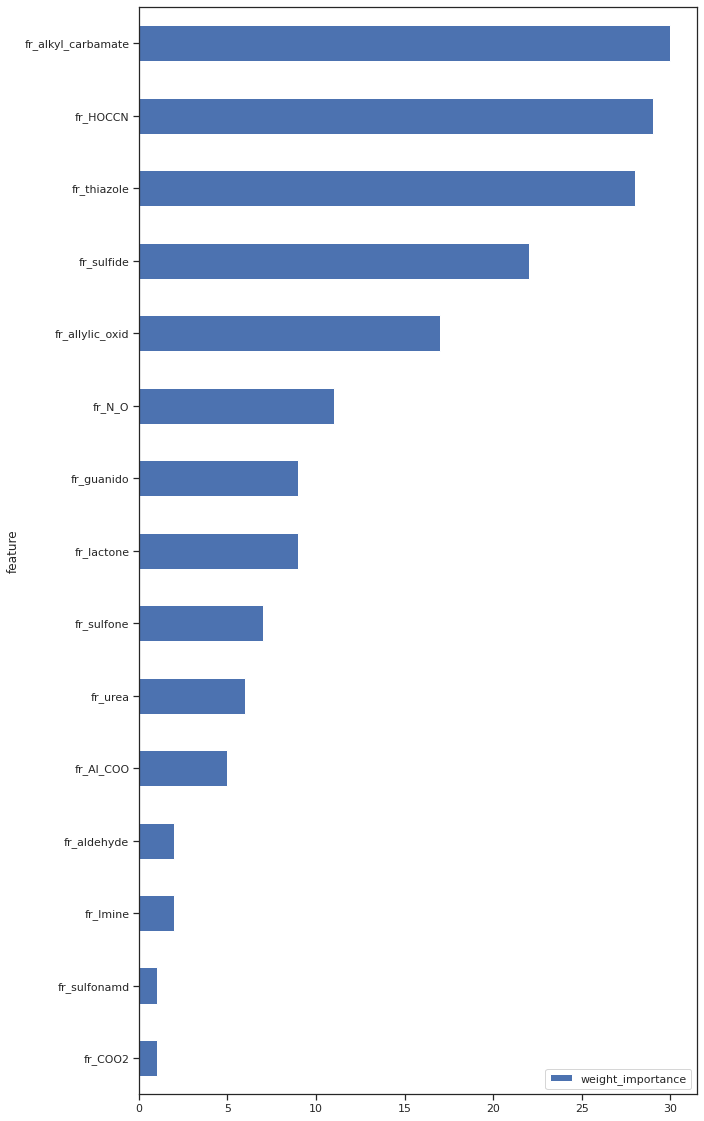

(               feature  gain_importance
 0    MaxAbsEStateIndex         0.817156
 1    MinAbsEStateIndex         0.626294
 2       MinEStateIndex         0.779465
 3                  qed         0.804071
 4                MolWt         1.007741
 ..                 ...              ...
 160         fr_sulfone         0.320278
 161  fr_term_acetylene         6.479991
 162        fr_thiazole         3.963488
 163   fr_unbrch_alkane         1.319552
 164            fr_urea         0.158285
 
 [165 rows x 2 columns],
                feature  weight_importance
 0    MaxAbsEStateIndex            18326.0
 1    MinAbsEStateIndex            17718.0
 2       MinEStateIndex            14675.0
 3                  qed            14095.0
 4                MolWt            11403.0
 ..                 ...                ...
 160         fr_sulfone                7.0
 161  fr_term_acetylene              526.0
 162        fr_thiazole               28.0
 163   fr_unbrch_alkane              128.0
 164    

In [36]:
xgb_trainer(df=df_IC50,
            feature_col = FEATURES,
            target_col=['log_IC50'],
            # test_index=df[df['ID'].str.startswith('paper')].index
           )

xgb params is: {'max_depth': 7, 'learning_rate': 0.001, 'subsample': 0.8, 'colsample_bytree': 0.2, 'eval_metric': 'rmse', 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor', 'random_state': 123}
(611, 209) (611, 1) (33, 209) (33, 1)
Int64Index([598, 600, 601, 602, 603, 604, 605, 606, 607, 609, 619, 620, 623,
            624, 625, 626, 627, 628, 629, 630, 631, 635, 636, 637, 639, 644,
            645, 649, 652, 654, 655, 656, 657],
           dtype='int64')
[0]	train-rmse:4.93389	valid-rmse:4.56720
[100]	train-rmse:4.52715	valid-rmse:4.26091
[200]	train-rmse:4.15901	valid-rmse:3.98300
[300]	train-rmse:3.82416	valid-rmse:3.74125
[400]	train-rmse:3.52107	valid-rmse:3.52606
[500]	train-rmse:3.24570	valid-rmse:3.33871
[600]	train-rmse:2.99562	valid-rmse:3.17845
[700]	train-rmse:2.76889	valid-rmse:3.02804
[800]	train-rmse:2.56222	valid-rmse:2.89728
[900]	train-rmse:2.37594	valid-rmse:2.77863
[1000]	train-rmse:2.20623	valid-rmse:2.67979
[1100]	train-rmse:

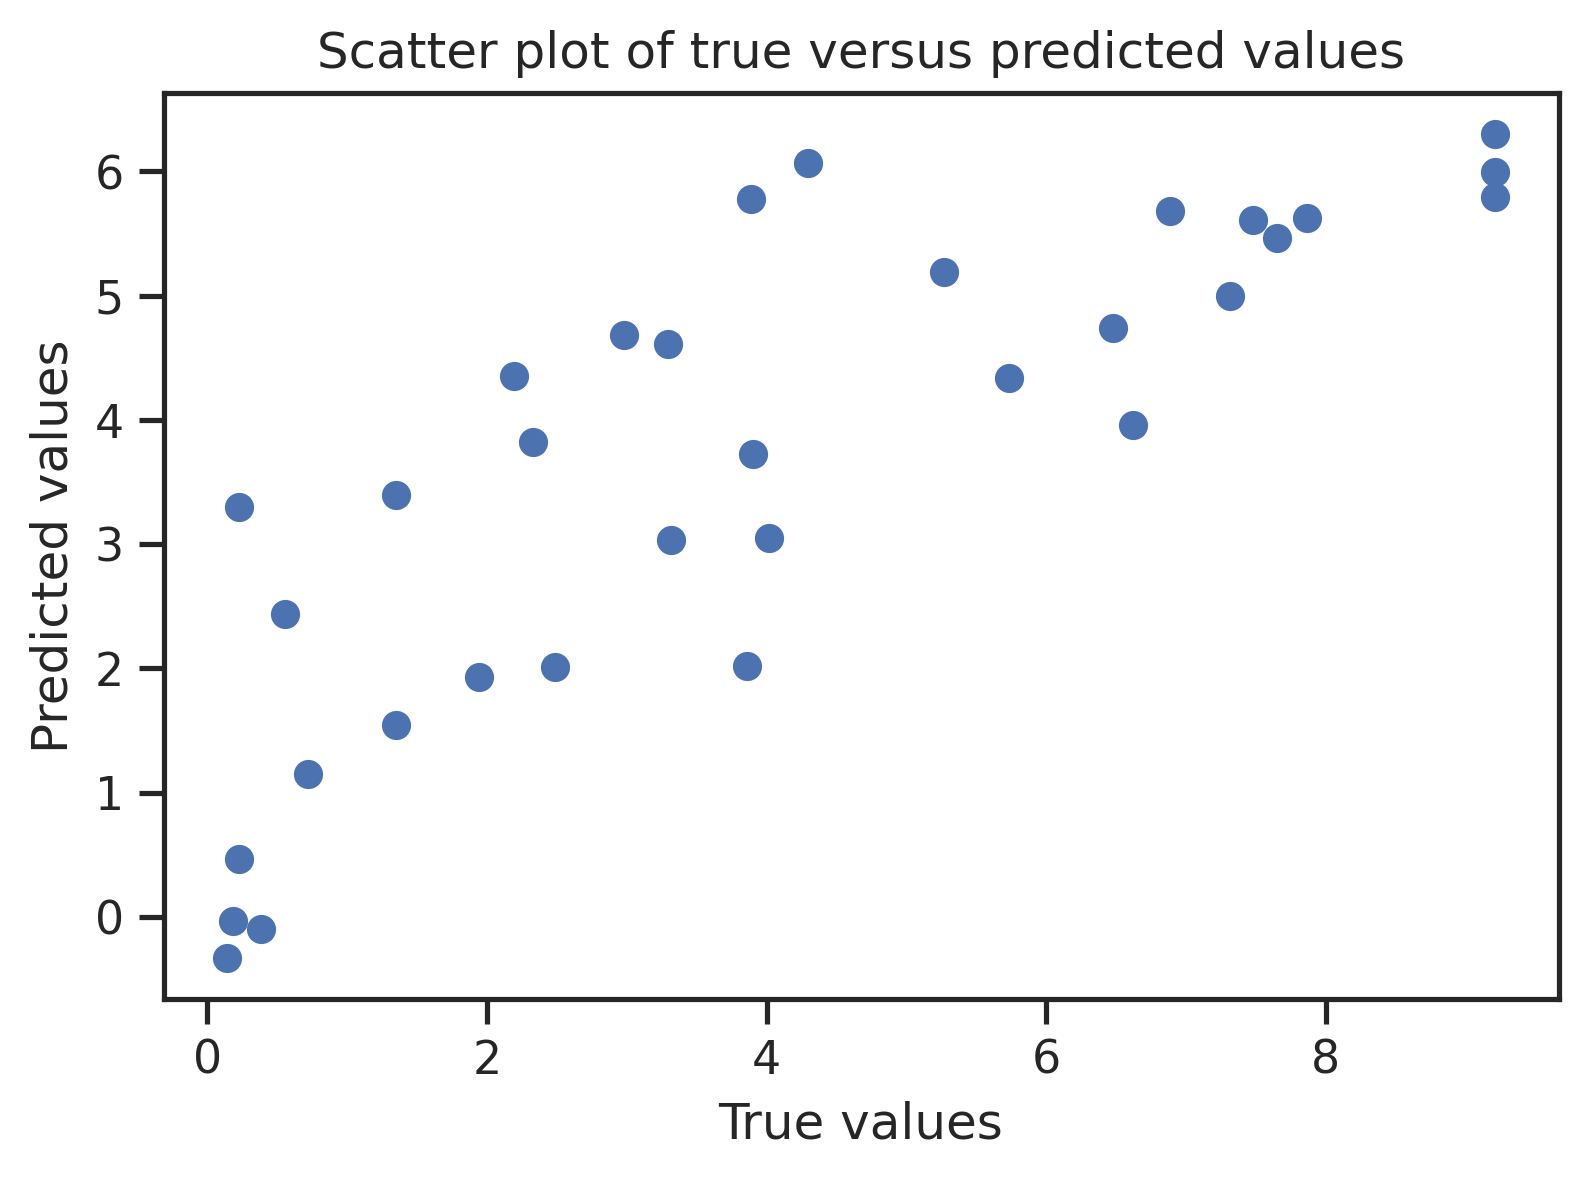

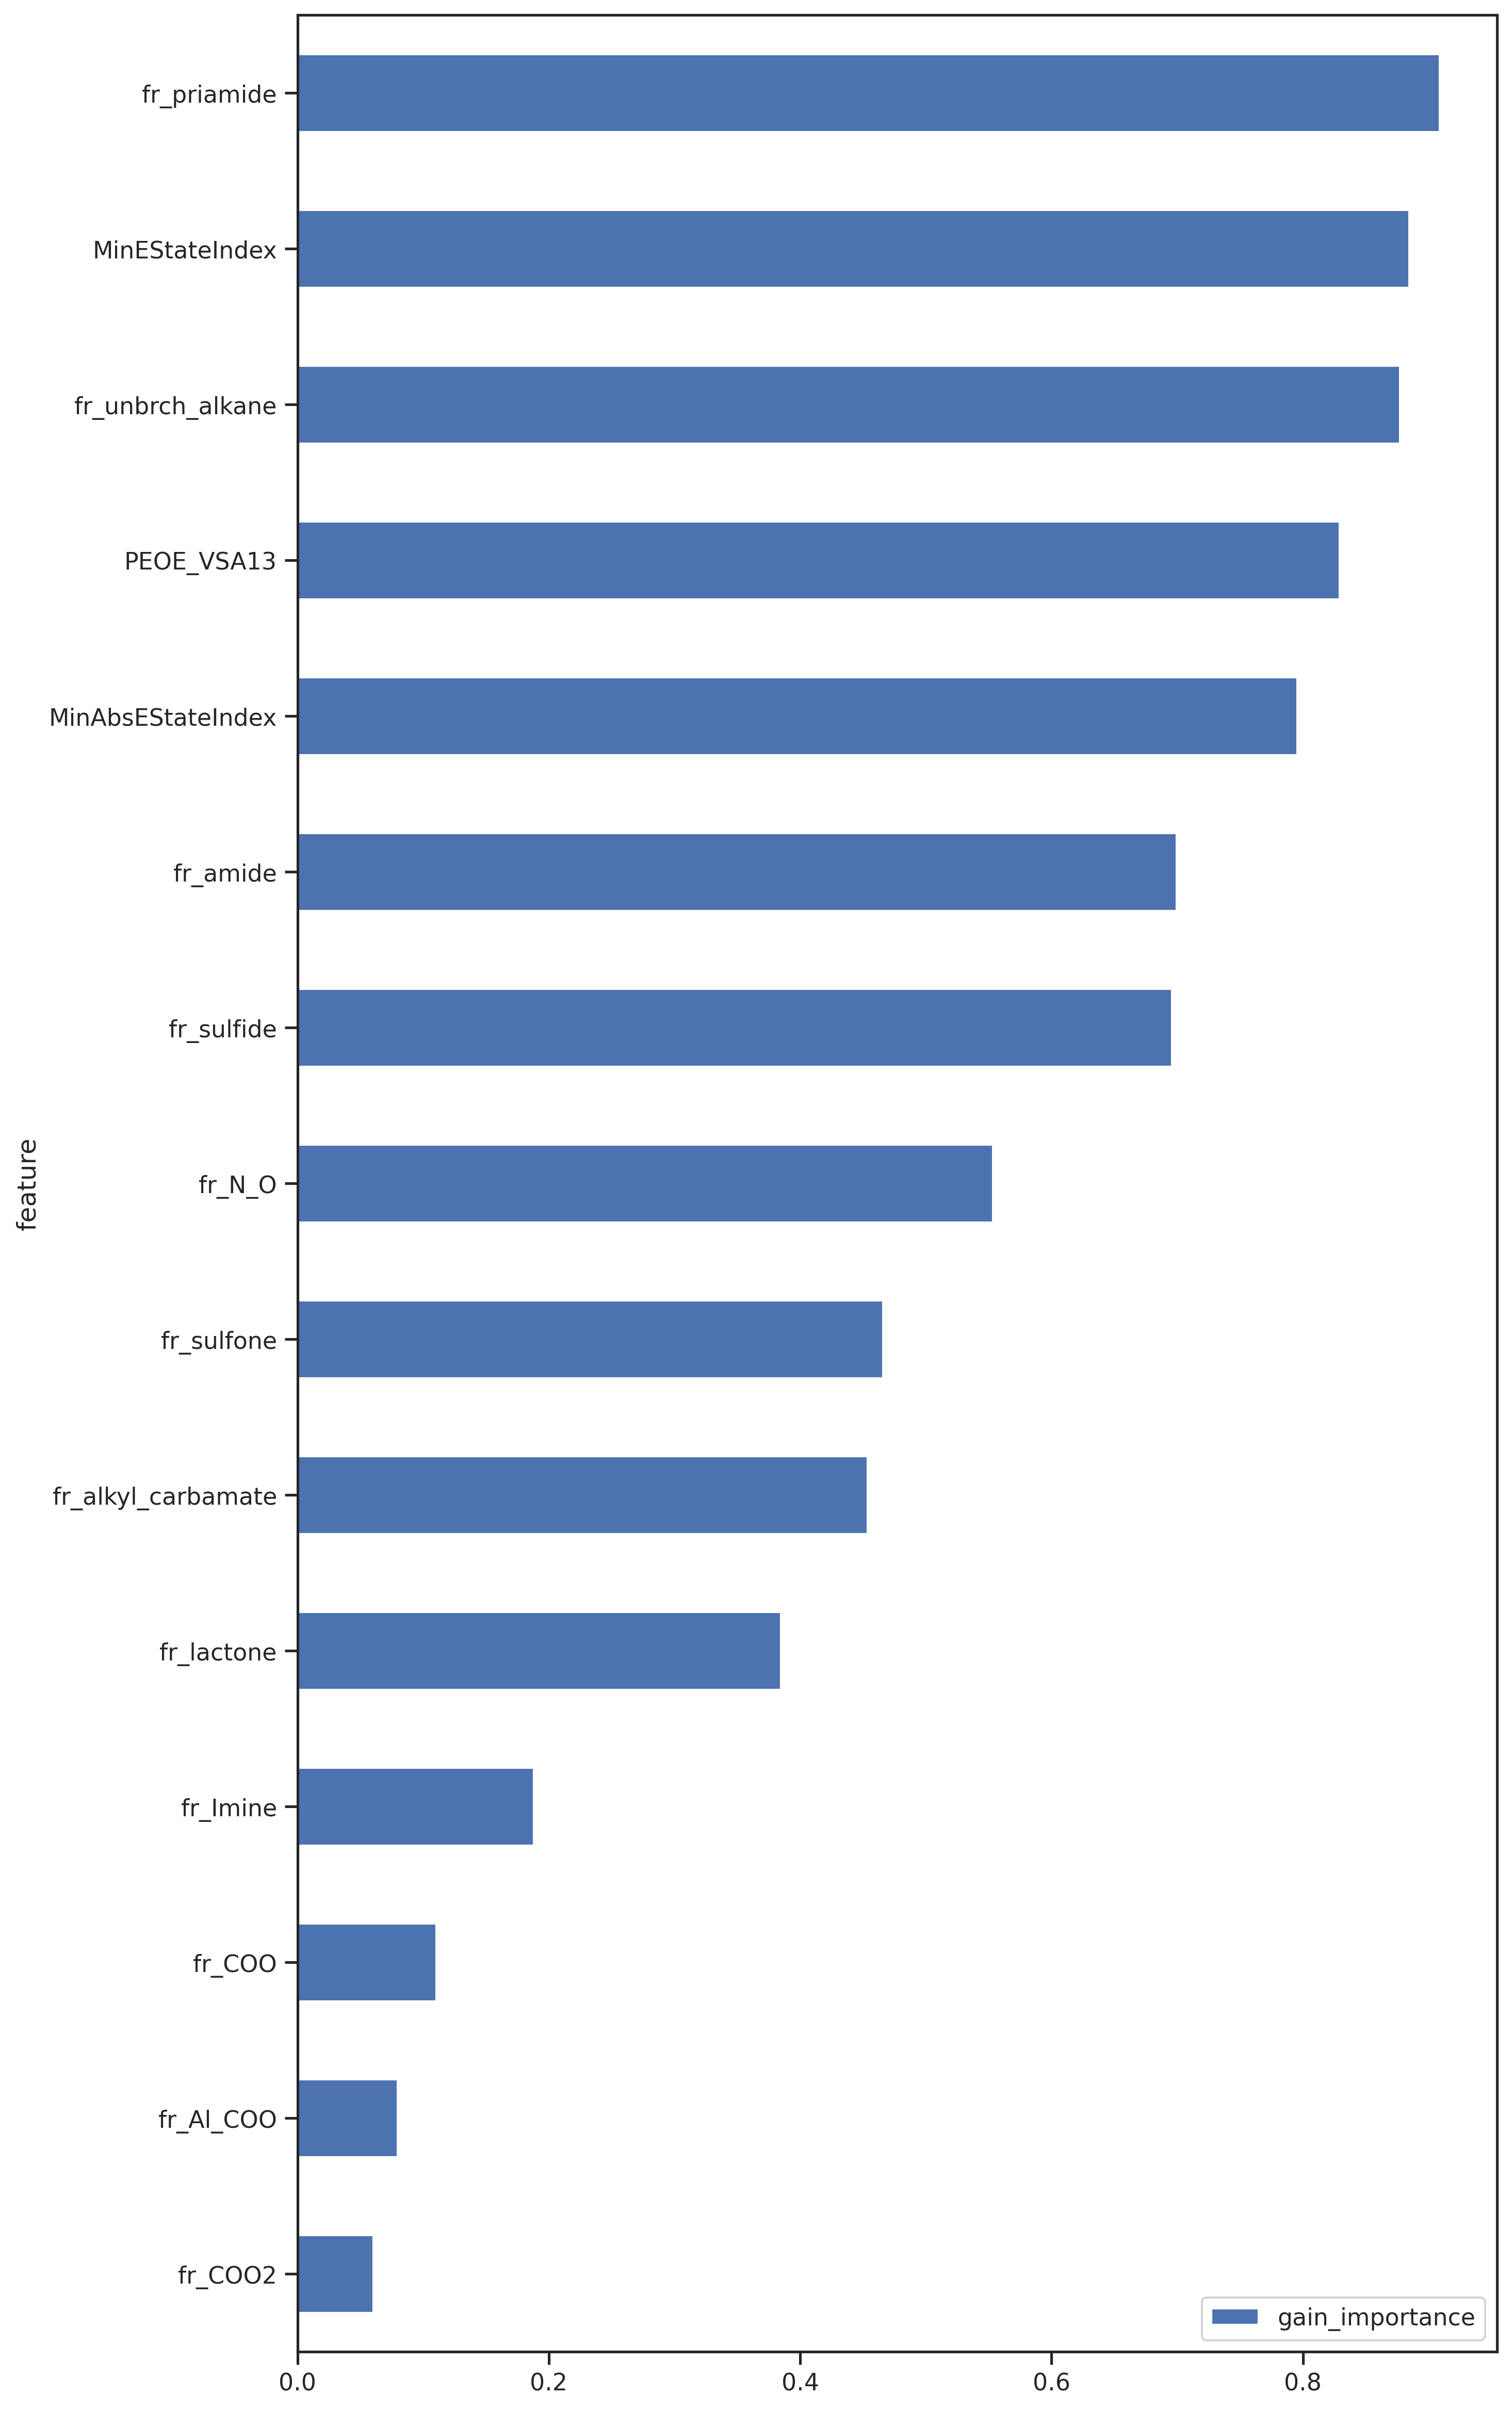

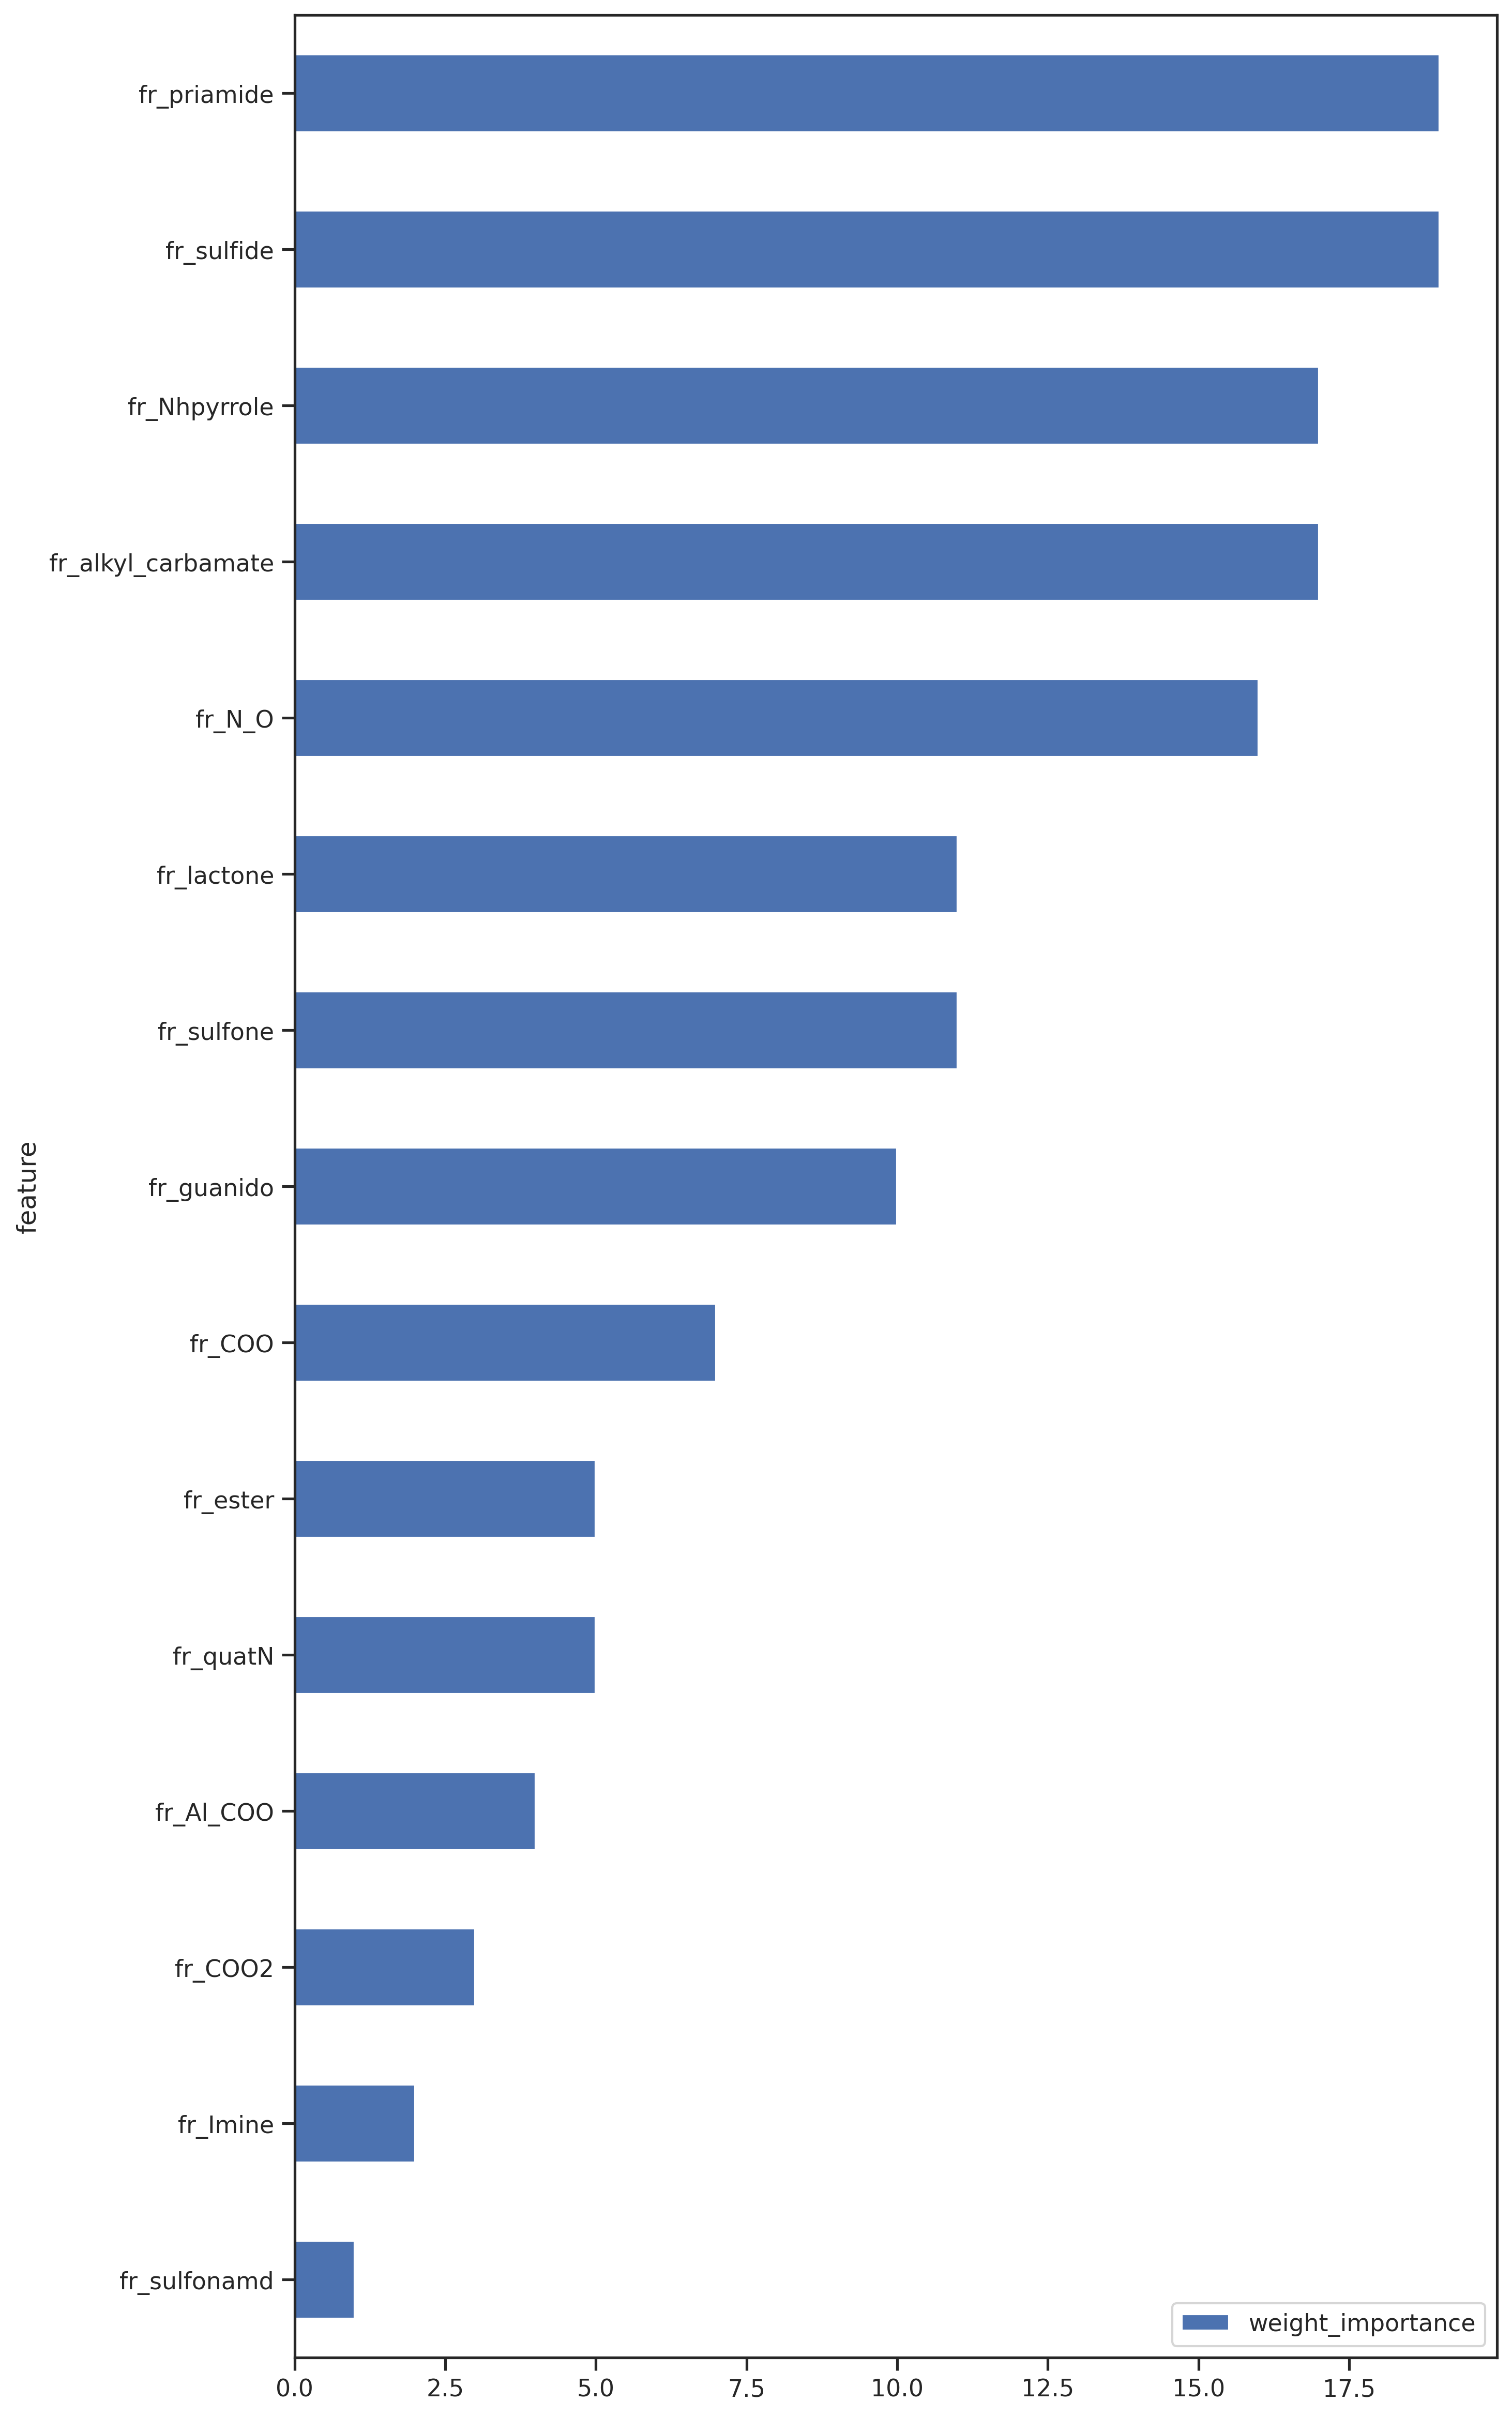

(               feature  gain_importance
 0    MaxAbsEStateIndex         1.064487
 1       MaxEStateIndex         1.091777
 2    MinAbsEStateIndex         0.795697
 3       MinEStateIndex         0.884749
 4                  qed         1.051423
 ..                 ...              ...
 167       fr_sulfonamd         5.113892
 168         fr_sulfone         0.466081
 169  fr_term_acetylene         8.130869
 170        fr_thiazole         6.435375
 171   fr_unbrch_alkane         0.877269
 
 [172 rows x 2 columns],
                feature  weight_importance
 0    MaxAbsEStateIndex            17098.0
 1       MaxEStateIndex            13931.0
 2    MinAbsEStateIndex            14968.0
 3       MinEStateIndex            12536.0
 4                  qed            12847.0
 ..                 ...                ...
 167       fr_sulfonamd                1.0
 168         fr_sulfone               11.0
 169  fr_term_acetylene              612.0
 170        fr_thiazole               24.0
 171   f

In [140]:
xgb_trainer(df=df_IC50,
            feature_col = FEATURES,
            target_col=['log_IC50'],
            test_index=df_IC50[df_IC50['ID'].str.startswith('paper')].index
           )

xgb params is: {'max_depth': 7, 'learning_rate': 0.001, 'subsample': 0.8, 'colsample_bytree': 0.2, 'eval_metric': 'rmse', 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor', 'random_state': 123}
(537, 168) (537, 1) (107, 168) (107, 1)
Int64Index([467, 468, 469, 470, 471, 472, 473, 474, 475, 476,
            ...
            568, 610, 611, 612, 613, 614, 615, 616, 617, 618],
           dtype='int64', length=107)
[0]	train-rmse:4.85986	valid-rmse:5.18775
[100]	train-rmse:4.45949	valid-rmse:4.91512
[200]	train-rmse:4.09488	valid-rmse:4.65583
[300]	train-rmse:3.76512	valid-rmse:4.43647
[400]	train-rmse:3.46506	valid-rmse:4.23903
[500]	train-rmse:3.19188	valid-rmse:4.05481
[600]	train-rmse:2.94372	valid-rmse:3.89969
[700]	train-rmse:2.71843	valid-rmse:3.75970
[800]	train-rmse:2.51303	valid-rmse:3.63081
[900]	train-rmse:2.32658	valid-rmse:3.51687
[1000]	train-rmse:2.15680	valid-rmse:3.42177
[1100]	train-rmse:2.00175	valid-rmse:3.33306
[1200]	train-rmse:1.

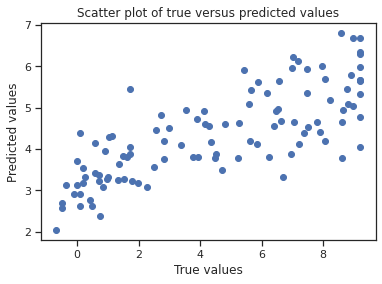

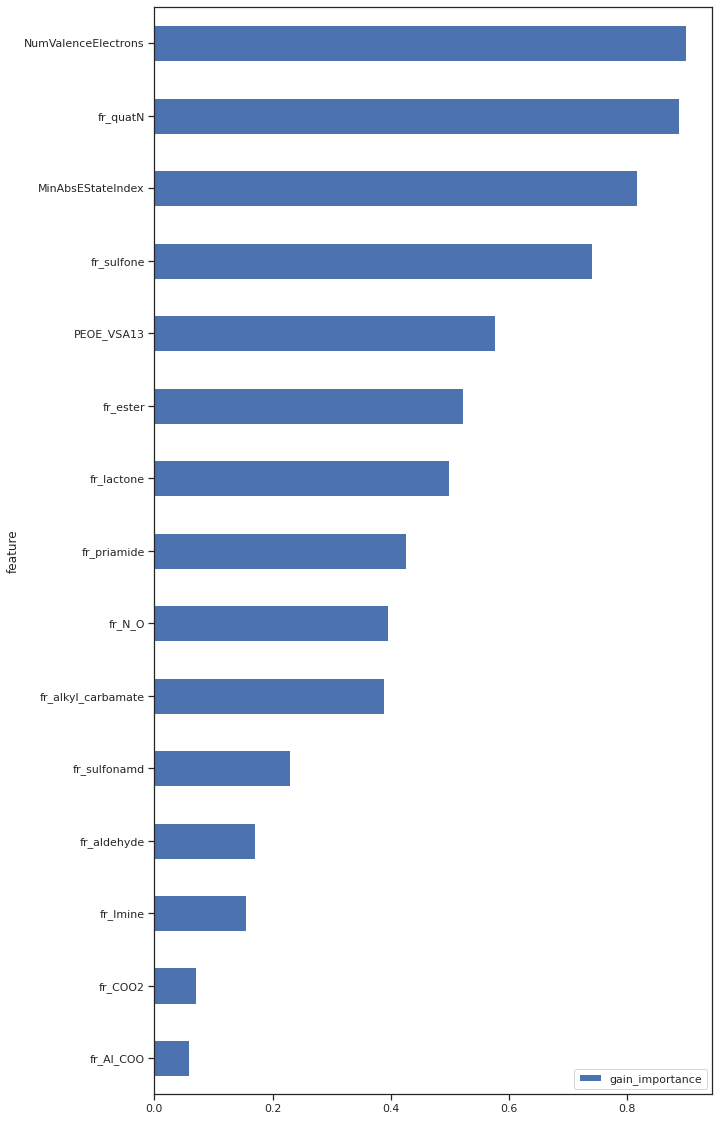

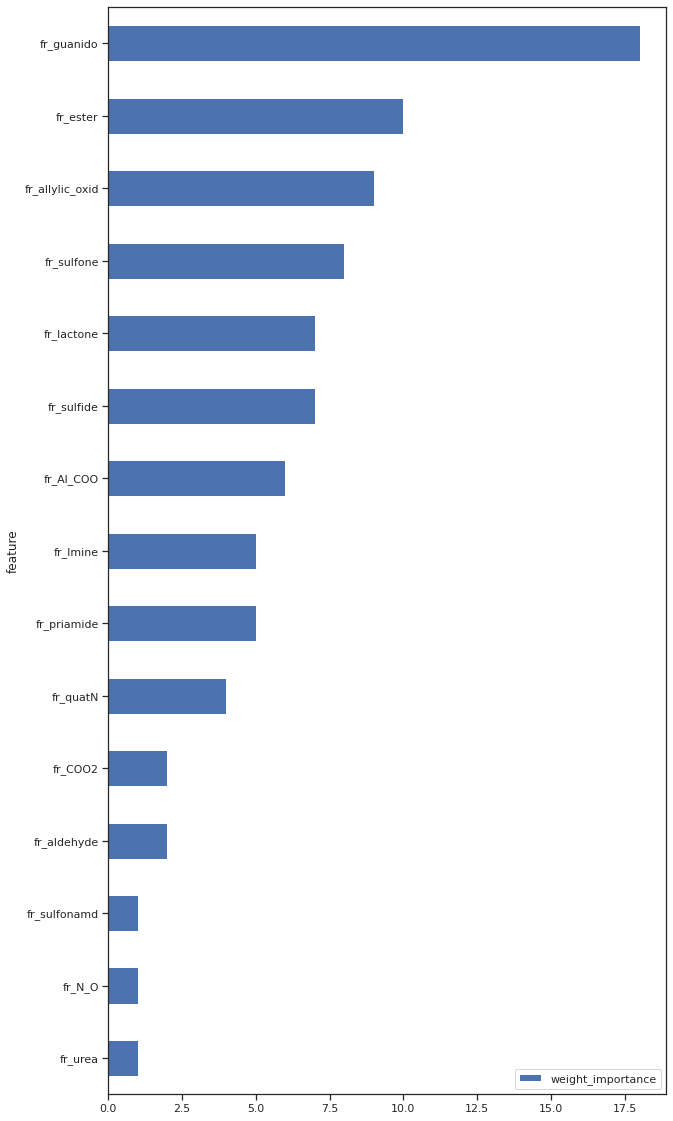

(               feature  gain_importance
 0    MaxAbsEStateIndex         1.549682
 1    MinAbsEStateIndex         0.816158
 2       MinEStateIndex         0.900296
 3                  qed         1.065091
 4                MolWt         0.995582
 ..                 ...              ...
 163         fr_sulfone         0.739882
 164  fr_term_acetylene        11.031363
 165        fr_thiazole         2.081998
 166   fr_unbrch_alkane         1.181378
 167            fr_urea         2.014786
 
 [168 rows x 2 columns],
                feature  weight_importance
 0    MaxAbsEStateIndex            15260.0
 1    MinAbsEStateIndex            14674.0
 2       MinEStateIndex            11658.0
 3                  qed            11202.0
 4                MolWt             8971.0
 ..                 ...                ...
 163         fr_sulfone                8.0
 164  fr_term_acetylene              610.0
 165        fr_thiazole               18.0
 166   fr_unbrch_alkane               90.0
 167    

In [39]:
xgb_trainer(df=df_IC50,
            feature_col = FEATURES,
            target_col=['log_IC50'],
            test_index=df_IC50[df_IC50['ID'].str.startswith('646')].index
           )

xgb params is: {'max_depth': 7, 'learning_rate': 0.001, 'subsample': 0.8, 'colsample_bytree': 0.2, 'eval_metric': 'rmse', 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor', 'random_state': 123}
(583, 168) (583, 1) (61, 168) (61, 1)
Int64Index([407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419,
            420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432,
            433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445,
            446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458,
            459, 460, 461, 462, 463, 464, 465, 466, 608],
           dtype='int64')
[0]	train-rmse:4.89157	valid-rmse:5.14145
[100]	train-rmse:4.49070	valid-rmse:4.87091
[200]	train-rmse:4.12596	valid-rmse:4.63140
[300]	train-rmse:3.79608	valid-rmse:4.41299
[400]	train-rmse:3.49595	valid-rmse:4.22741
[500]	train-rmse:3.22283	valid-rmse:4.05448
[600]	train-rmse:2.97462	valid-rmse:3.89705
[700]	train-rmse:2.74927	valid-

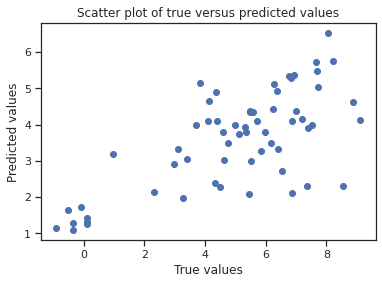

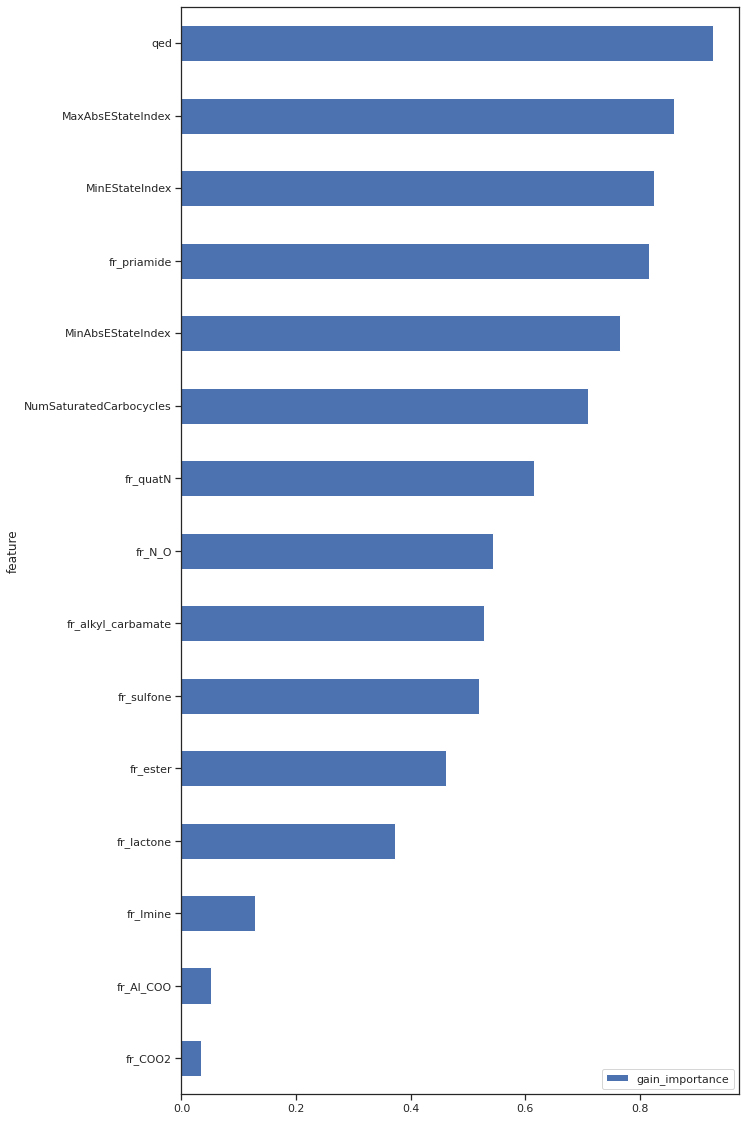

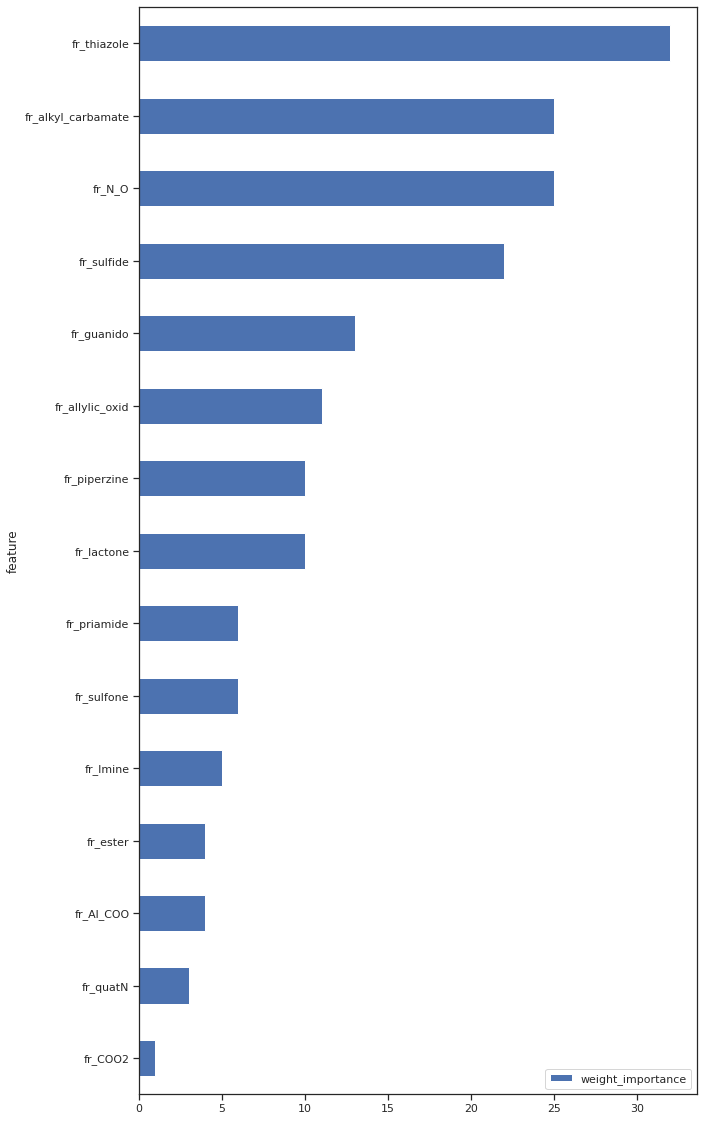

(               feature  gain_importance
 0    MaxAbsEStateIndex         0.858569
 1    MinAbsEStateIndex         0.765177
 2       MinEStateIndex         0.823695
 3                  qed         0.926945
 4                MolWt         1.316822
 ..                 ...              ...
 160         fr_sulfide         1.451519
 161         fr_sulfone         0.519126
 162  fr_term_acetylene         7.503205
 163        fr_thiazole         5.382477
 164   fr_unbrch_alkane         1.431804
 
 [165 rows x 2 columns],
                feature  weight_importance
 0    MaxAbsEStateIndex            16365.0
 1    MinAbsEStateIndex            16474.0
 2       MinEStateIndex            13426.0
 3                  qed            12763.0
 4                MolWt            10439.0
 ..                 ...                ...
 160         fr_sulfide               22.0
 161         fr_sulfone                6.0
 162  fr_term_acetylene              459.0
 163        fr_thiazole               32.0
 164   f

In [40]:
xgb_trainer(df=df_IC50,
            feature_col = FEATURES,
            target_col=['log_IC50'],
            test_index=df_IC50[df_IC50['ID'].str.startswith('31678')].index
           )

xgb params is: {'max_depth': 7, 'learning_rate': 0.001, 'subsample': 0.8, 'colsample_bytree': 0.2, 'eval_metric': 'rmse', 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist', 'predictor': 'gpu_predictor', 'random_state': 123}
(616, 168) (616, 1) (28, 168) (28, 1)
Int64Index([569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 581, 582,
            583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595,
            596, 597],
           dtype='int64')
[0]	train-rmse:5.00497	valid-rmse:2.15807
[100]	train-rmse:4.59356	valid-rmse:1.91598
[200]	train-rmse:4.21923	valid-rmse:1.72339
[300]	train-rmse:3.88031	valid-rmse:1.58238
[400]	train-rmse:3.57363	valid-rmse:1.48158
[500]	train-rmse:3.29446	valid-rmse:1.42595
[600]	train-rmse:3.04028	valid-rmse:1.40584
[700]	train-rmse:2.81007	valid-rmse:1.41776
Model saved to xgb_model.bin
Spearman correlation: 0.65


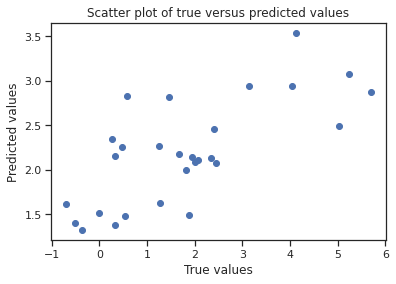

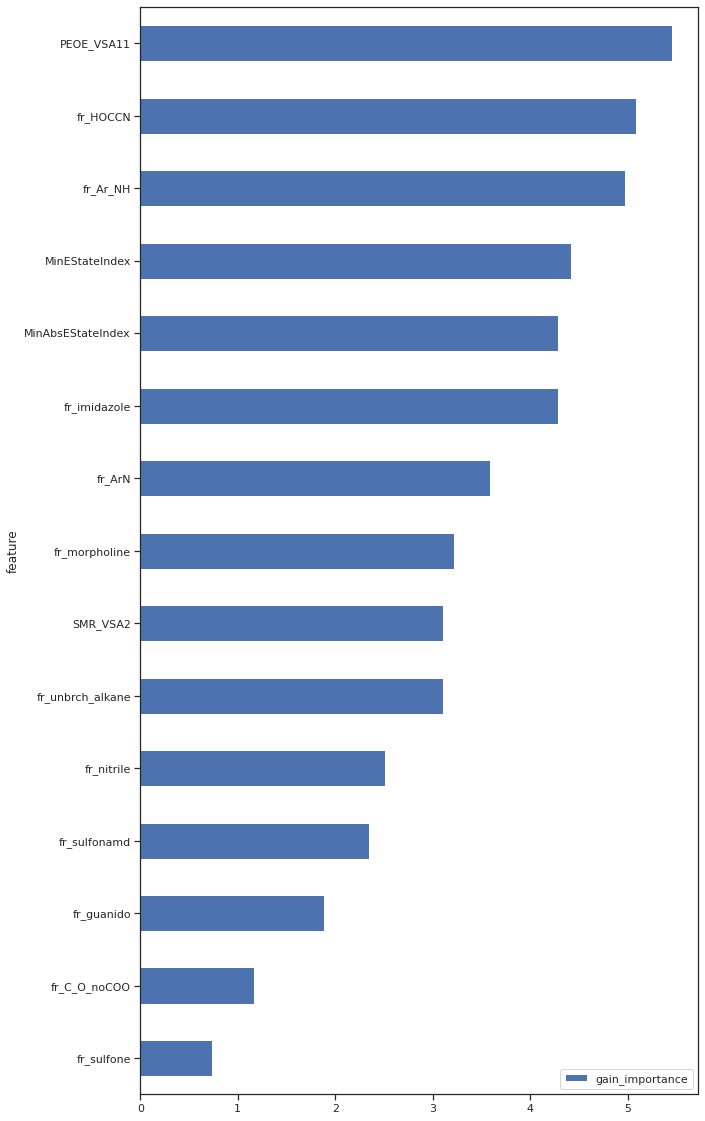

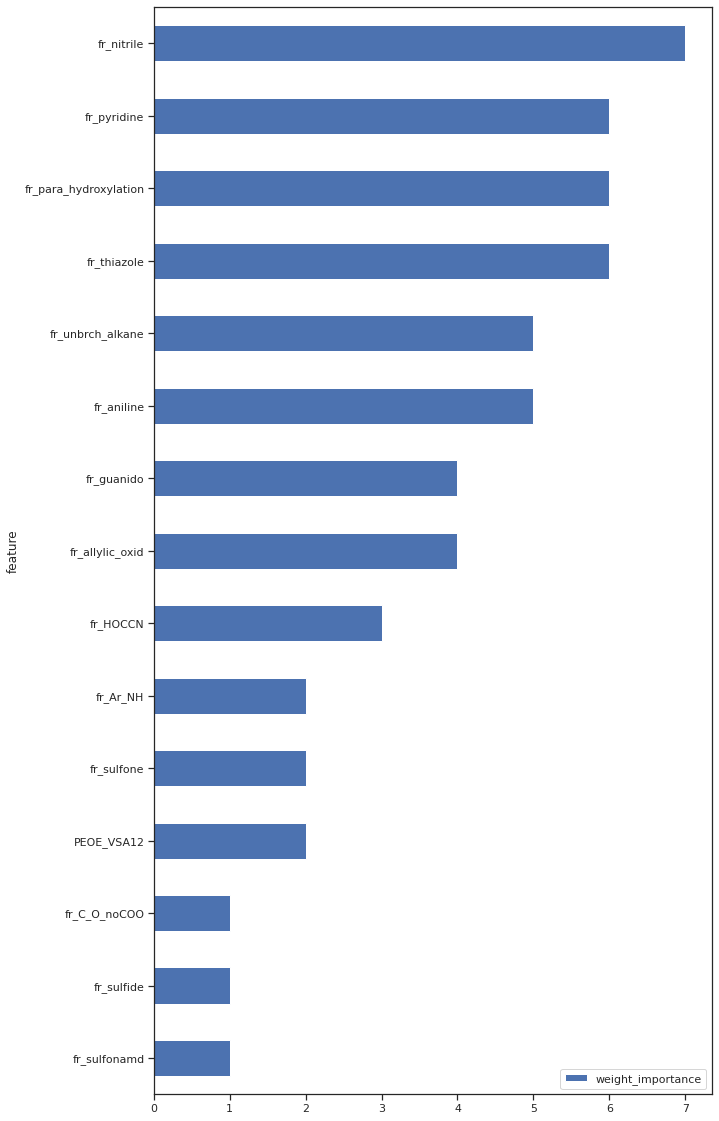

(               feature  gain_importance
 0    MaxAbsEStateIndex         6.350491
 1    MinAbsEStateIndex         4.291302
 2       MinEStateIndex         4.423186
 3                  qed         5.590048
 4                MolWt         7.670031
 ..                 ...              ...
 149       fr_sulfonamd         2.350632
 150         fr_sulfone         0.736450
 151  fr_term_acetylene        26.276693
 152        fr_thiazole        12.863246
 153   fr_unbrch_alkane         3.108227
 
 [154 rows x 2 columns],
                feature  weight_importance
 0    MaxAbsEStateIndex             1327.0
 1    MinAbsEStateIndex             1104.0
 2       MinEStateIndex             1024.0
 3                  qed              758.0
 4                MolWt              796.0
 ..                 ...                ...
 149       fr_sulfonamd                1.0
 150         fr_sulfone                2.0
 151  fr_term_acetylene              159.0
 152        fr_thiazole                6.0
 153   f

In [41]:
xgb_trainer(df=df_IC50,
            feature_col = FEATURES,
            target_col=['log_IC50'],
            test_index=df_IC50[df_IC50['ID'].str.startswith('625')].index
           )

## Predict

use paper[test] as model

In [43]:
df_predict = pd.read_csv('library_bioactive.csv')

In [ ]:
feat = smi2prop(df_predict)

[03:59:32] Explicit valence for atom # 48 N, 4, is greater than permitted
[03:59:32] SMILES Parse Error: syntax error while parsing: O=C(O)CC1=C(C)C2=C(N(CCCCCCCC)CC2)C(NC(C(C)(C)C)=O)=C1C.O=S(O)(O)=O.[1/2]
[03:59:32] SMILES Parse Error: Failed parsing SMILES 'O=C(O)CC1=C(C)C2=C(N(CCCCCCCC)CC2)C(NC(C(C)(C)C)=O)=C1C.O=S(O)(O)=O.[1/2]' for input: 'O=C(O)CC1=C(C)C2=C(N(CCCCCCCC)CC2)C(NC(C(C)(C)C)=O)=C1C.O=S(O)(O)=O.[1/2]'
[03:59:32] SMILES Parse Error: syntax error while parsing: O=C(O)/C=C/C(O)=O.C1(NC(C2CC2)C3CC3)=NCCO1.[0.5]
[03:59:32] SMILES Parse Error: Failed parsing SMILES 'O=C(O)/C=C/C(O)=O.C1(NC(C2CC2)C3CC3)=NCCO1.[0.5]' for input: 'O=C(O)/C=C/C(O)=O.C1(NC(C2CC2)C3CC3)=NCCO1.[0.5]'
[03:59:32] SMILES Parse Error: syntax error while parsing: O[C@H]1[C@@H](O[C@@]2([H])[C@@]1([H])O[P@](OC2)([S])=O)N3C4=C(C(N)=NC=N4)N=C3.[Na+].[-]
[03:59:32] SMILES Parse Error: Failed parsing SMILES 'O[C@H]1[C@@H](O[C@@]2([H])[C@@]1([H])O[P@](OC2)([S])=O)N3C4=C(C(N)=NC=N4)N=C3.[Na+].[-]' for input: 'O

In [ ]:
!wget https://ftp.ebi.ac.uk/pub/databases/chembl/ChEMBLdb/latest/chembl_32_chemreps.txt.gz

In [2]:
!gzip -d chembl_32_chemreps.txt.gz

In [3]:
!ls

00_feature.ipynb  04_toolbox.ipynb	  index.ipynb		 sidebar.yml
01_plot.ipynb	  EDA_tanimoto.ipynb	  library_bioactive.csv  styles.css
02_train.ipynb	  _quarto.yml		  nbdev.yml		 train.ipynb
03_dataset.ipynb  chembl_32_chemreps.txt  old			 xgb_model.bin


In [49]:
!unzip DOWNLOAD-nUMJJ7h__N-0u6uvnBhLhQ5GP7JFhtMlN8b6BmQqvV0\=.zip

Archive:  DOWNLOAD-nUMJJ7h__N-0u6uvnBhLhQ5GP7JFhtMlN8b6BmQqvV0=.zip
  inflating: DOWNLOAD-nUMJJ7h__N-0u6uvnBhLhQ5GP7JFhtMlN8b6BmQqvV0=.csv  


In [5]:
import pandas as pd

In [17]:
chembl = pd.read_csv('chembl_32_chemreps.txt',sep='\t')

In [52]:
small = chembl[:1000]

In [13]:
from tools.feature import *

In [141]:
feat = smi2prop(small,'canonical_smiles','chembl_id',False,False)

In [86]:
xgb_predict?

Signature: xgb_predict(df, feature_col, ID_col='ID', model_file='xgb_model.bin')
Docstring: <no docstring>
File:      /usr/local/lib/python3.9/dist-packages/tools/train.py
Type:      function


In [88]:
feat

chembl_id  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
0     CHEMBL153534           5.290932        5.290932           0.032539   
1     CHEMBL440060          14.980987       14.980987           0.002333   
2     CHEMBL440245          15.330452       15.330452           0.018448   
3     CHEMBL440249          15.971096       15.971096           0.137970   
4     CHEMBL405398           5.407345        5.407345           0.738360   
..             ...                ...             ...                ...   
995   CHEMBL502060          14.067993       14.067993           0.048379   
996  CHEMBL4116107          13.463511       13.463511           0.086677   
997   CHEMBL502072           6.053965        6.053965           0.000000   
998   CHEMBL502296          12.052056       12.052056           0.196596   
999   CHEMBL539383          12.853345       12.853345           0.536380   

     MinEStateIndex       qed     MolWt  HeavyAtomMolWt   ExactMolWt  \
0          0.032539  0.608781   235.316         222.212   235.089166   
1         -1.882871  0.016357  2883.390        2669.694  2881.593331   
2         -2.154889  0.010798  3548.213        3278.069  3546.042308   
3         -2.777766  0.016726  2598.157        2442.925  2596.040132   
4          0.738360  0.623114   429.322         408.154   428.096021   
..              ...       ...       ...             ...          ...   
995       -5.393524  0.015743  4692.741        4515.333  4689.401569   
996       -0.282739  0.281558   463.542         441.366   463.159058   
997        0.000000  0.825203   272.139         261.051   271.039151   
998       -0.210111  0.741816   311.345         294.209   311.138225   
999       -0.975836  0.380183   343.517         322.349   343.106456   

     NumValenceElectrons  NumRadicalElectrons  MaxPartialCharge  \
0                   84.0                  0.0          0.212375   
1                 1134.0                  0.0          0.245559   
2                 1404.0                  0.0          0.302936   
3                  996.0                  0.0          0.333665   
4                  140.0                  0.0          0.142814   
..                   ...                  ...               ...   
995               1622.0                  0.0          0.351232   
996                168.0                  0.0          0.228535   
997                 90.0                  0.0          0.216080   
998                118.0                  0.0          0.276222   
999                120.0                  0.0          0.196912   

     MinPartialCharge  MaxAbsPartialCharge  MinAbsPartialCharge  \
0           -0.369771             0.369771             0.212375   
1           -0.393679             0.393679             0.245559   
2           -0.481229             0.481229             0.302936   
3           -0.507967             0.507967             0.333665   
4           -0.381162             0.381162             0.142814   
..                ...                  ...                  ...   
995         -0.393166             0.393166             0.351232   
996         -0.369979             0.369979             0.228535   
997         -0.353030             0.353030             0.216080   
998         -0.376386             0.376386             0.276222   
999         -0.615337             0.615337             0.196912   

     FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  BCUT2D_MWHI  \
0            1.500000          2.250000          2.812500    32.133490   
1            0.321782          0.628713          1.014851    32.166377   
2            0.294821          0.605578          0.976096    16.373215   
3            0.421622          0.843243          1.340541    35.495701   
4            1.148148          2.037037          2.925926    79.918731   
..                ...               ...               ...          ...   
995          0.211409          0.419463          0.694631    32.478513   
996          1.212121        

In [99]:
feat = feat.dropna()

In [103]:


scaler = StandardScaler()

In [102]:
feat[FEATURES]

MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0             5.290932        5.290932           0.032539        0.032539   
1            14.980987       14.980987           0.002333       -1.882871   
2            15.330452       15.330452           0.018448       -2.154889   
3            15.971096       15.971096           0.137970       -2.777766   
4             5.407345        5.407345           0.738360        0.738360   
..                 ...             ...                ...             ...   
995          14.067993       14.067993           0.048379       -5.393524   
996          13.463511       13.463511           0.086677       -0.282739   
997           6.053965        6.053965           0.000000        0.000000   
998          12.052056       12.052056           0.196596       -0.210111   
999          12.853345       12.853345           0.536380       -0.975836   

          qed     MolWt  HeavyAtomMolWt   ExactMolWt  NumValenceElectrons  \
0    0.608781   235.316         222.212   235.089166                 84.0   
1    0.016357  2883.390        2669.694  2881.593331               1134.0   
2    0.010798  3548.213        3278.069  3546.042308               1404.0   
3    0.016726  2598.157        2442.925  2596.040132                996.0   
4    0.623114   429.322         408.154   428.096021                140.0   
..        ...       ...             ...          ...                  ...   
995  0.015743  4692.741        4515.333  4689.401569               1622.0   
996  0.281558   463.542         441.366   463.159058                168.0   
997  0.825203   272.139         261.051   271.039151                 90.0   
998  0.741816   311.345         294.209   311.138225                118.0   
999  0.380183   343.517         322.349   343.106456                120.0   

     NumRadicalElectrons  MaxPartialCharge  MinPartialCharge  \
0                    0.0          0.212375         -0.369771   
1                    0.0          0.245559         -0.393679   
2                    0.0          0.302936         -0.481229   
3                    0.0          0.333665         -0.507967   
4                    0.0          0.142814         -0.381162   
..                   ...               ...               ...   
995                  0.0          0.351232         -0.393166   
996                  0.0          0.228535         -0.369979   
997                  0.0          0.216080         -0.353030   
998                  0.0          0.276222         -0.376386   
999                  0.0          0.196912         -0.615337   

     MaxAbsPartialCharge  MinAbsPartialCharge  FpDensityMorgan1  \
0               0.369771             0.212375          1.500000   
1               0.393679             0.245559          0.321782   
2               0.481229             0.302936          0.294821   
3               0.507967             0.333665          0.421622   
4               0.381162             0.142814          1.148148   
..                   ...                  ...               ...   
995             0.393166             0.351232          0.211409   
996             0.369979             0.228535          1.212121   
997             0.353030             0.216080          1.294118   
998             0.376386             0.276222          1.478261   
999             0.615337             0.196912          1.043478   

     FpDensityMorgan2  FpDensityMorgan3  BCUT2D_MWHI  BCUT2D_MWLOW  \
0            2.250000          2.812500    32.133490     10.243565   
1            0.628713          1.014851    32.166377      9.962044   
2            0.605578          0.976096    16.373215      9.924097   
3            0.843243          1.340541    35.495701      9.968082   
4            2.037037          2.925926    79.918731     10.209771   
..                ...               ...          ...           ...   
995          0.419463          0.694631    32.478513     10.005510   
996          2.060606

In [106]:
feat = feat.copy()

In [ ]:
# Load the scaler from the file
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [142]:
feat[FEATURES] = scaler.fit_transform(feat[FEATURES])

In [143]:
pred = xgb_predict(feat,FEATURES,'chembl_id')

In [96]:
feat.isnull().values.any()

True

In [144]:
pred.sort_values('preds')

chembl_id     preds
105  CHEMBL441925  2.494757
3    CHEMBL440249  3.120924
77   CHEMBL438995  3.168821
365  CHEMBL529226  3.193859
871  CHEMBL501569  3.218371
..            ...       ...
190  CHEMBL500790  8.100444
530  CHEMBL503982  8.190604
326  CHEMBL154392  8.236906
791  CHEMBL539442  8.277118
662  CHEMBL509252  8.320975

[1000 rows x 2 columns]

In [98]:
np.isinf(feat.iloc[:,1:].values.astype(np.float64)).any()

False

In [93]:
np.isinf(small).any()

ValueError: could not convert string to float: 'Cc1cc(-c2csc(N=C(N)N)n2)cn1C'